In [35]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

In [2]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Data

In [3]:
data = pd.read_excel('youtube_statistics.xlsx')
data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


## Descriptive Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Semua tipe data dari setiap kolom sudah sesuai, begitu juga dengan nama kolom dan isinya juga sudah sesuai.
Terdapat 36791 baris data, dengan jumlah attribut 18.

In [5]:
print("Nilai yang kosong di setiap kolom:")
missing_values = data.isnull().sum()
print(missing_values)

Nilai yang kosong di setiap kolom:
trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64


description memiliki nilai kosong.

In [6]:
data.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,publish_date
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000,36791
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361,2018-02-24 11:20:36.334973440
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,2017-05-27 00:00:00
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000,2017-12-31 00:00:00
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000,2018-02-23 00:00:00
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000,2018-04-23 00:00:00
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,2018-06-13 00:00:00
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174,NaN


In [7]:
data_new = data.copy()
data1 = data.copy()
data_new['comments_disabled'] = data_new['comments_disabled'].astype(str)
data_new['ratings_disabled'] = data_new['ratings_disabled'].astype(str)
data_new['video_error_or_removed'] = data_new['video_error_or_removed'].astype(str)

In [8]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description'] 
nums = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [10]:
data[nums].describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


Sebaran data feature likes, dislikes, comment_count, desc_len, dan views terlihat miring (selisih mean & median cukup besar)

In [11]:
data[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,36791,36791,36791,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,2,2,2,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,35611,36034,36780,166


- Data di trending_date memiliki 205 nilai unik  
- Data dalam judul memiliki 16431 nilai unik   
- Data di channel_title memiliki 1390 nilai unik  
- Data di publikasikan_waktu memiliki 12375 nilai unik  
- Data dalam tag memiliki 12463 nilai unik   
- Data di comments_disabled memiliki 2 nilai unik dengan mayoritas nilai False   
- Data dalam rating_disabled memiliki 2 nilai unik dengan mayoritas nilai False   
- Data dalam video_error_or_removed memiliki 2 nilai unik dengan mayoritas nilai False   
- Data dalam deskripsi memiliki 13979 nilai unik

## Univariate Analysis

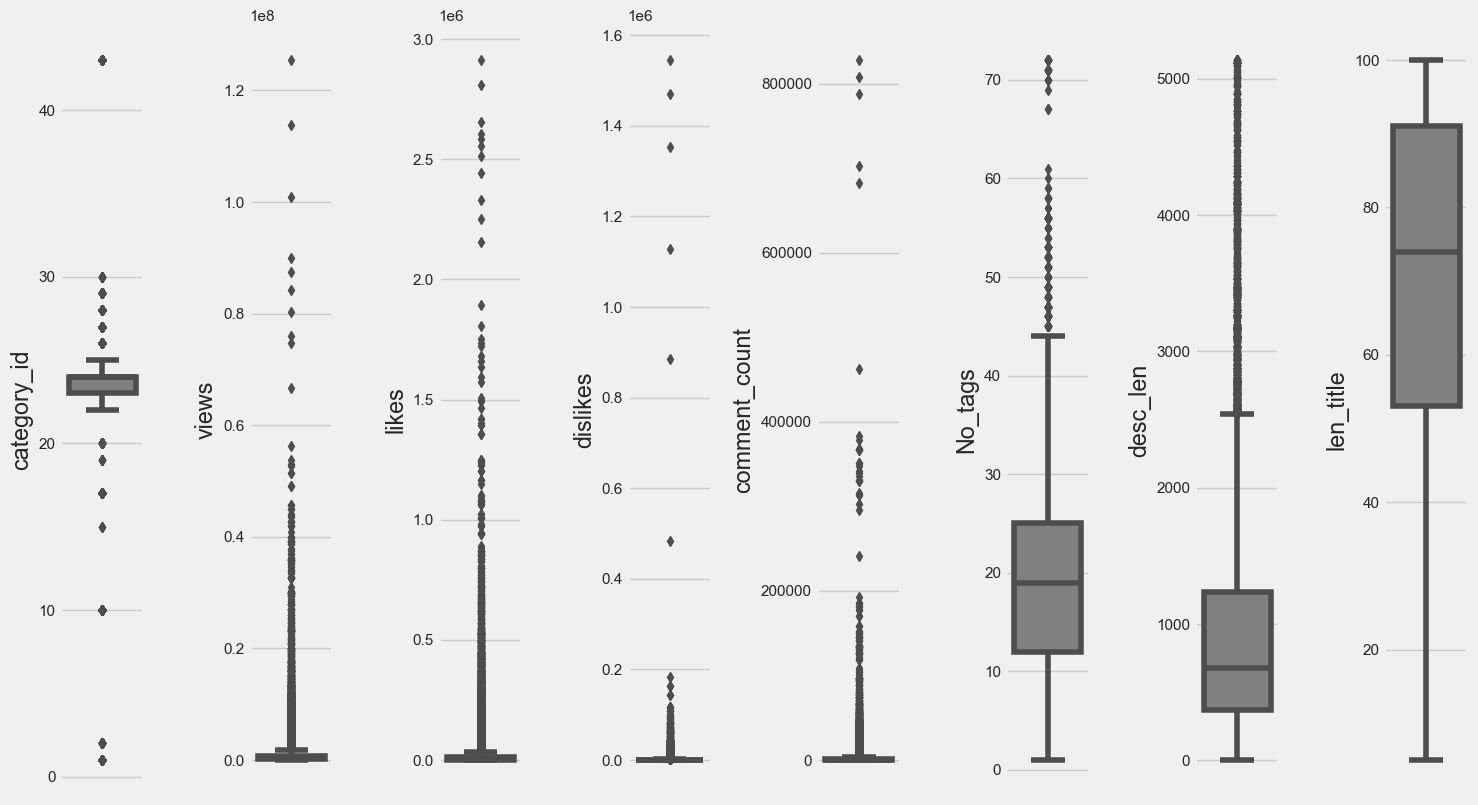

In [15]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data_new[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Terlihat pada grafik boxplot di atas bahwa fitur view, likes, dislikes, comment_count, o_tags, dan desc_len memiliki banyak outlier sehingga diperlukan transformasi logaritmik untuk fitur tersebut.

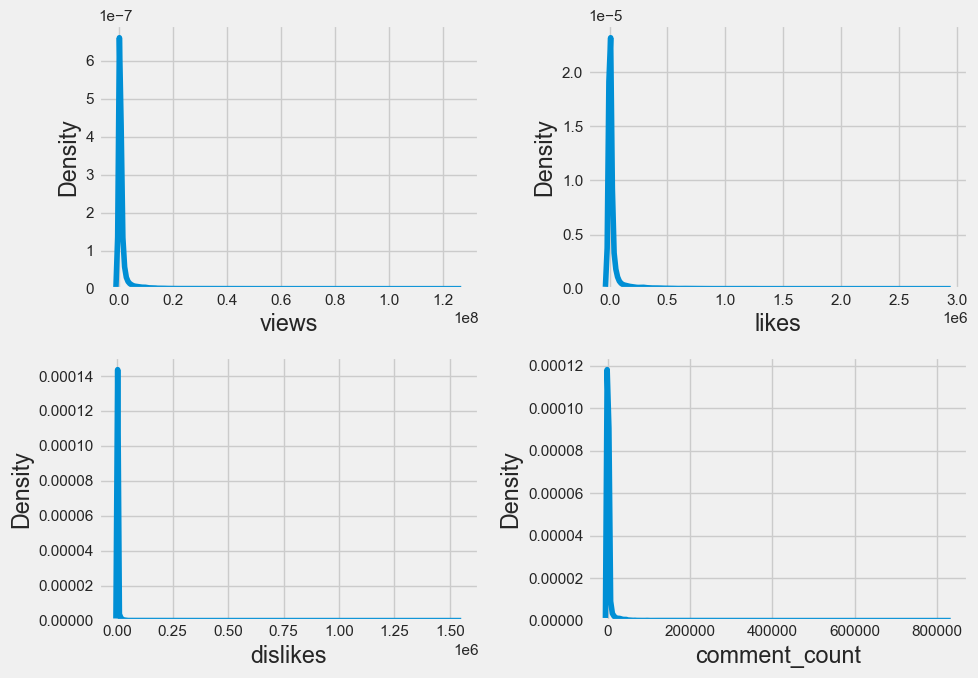

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

sns.kdeplot(data_new['views'], ax=axs[0, 0])
sns.kdeplot(data_new['likes'], ax=axs[0, 1])
sns.kdeplot(data_new['dislikes'], ax=axs[1, 0])
sns.kdeplot(data_new['comment_count'], ax=axs[1, 1])

plt.tight_layout()
plt.show()

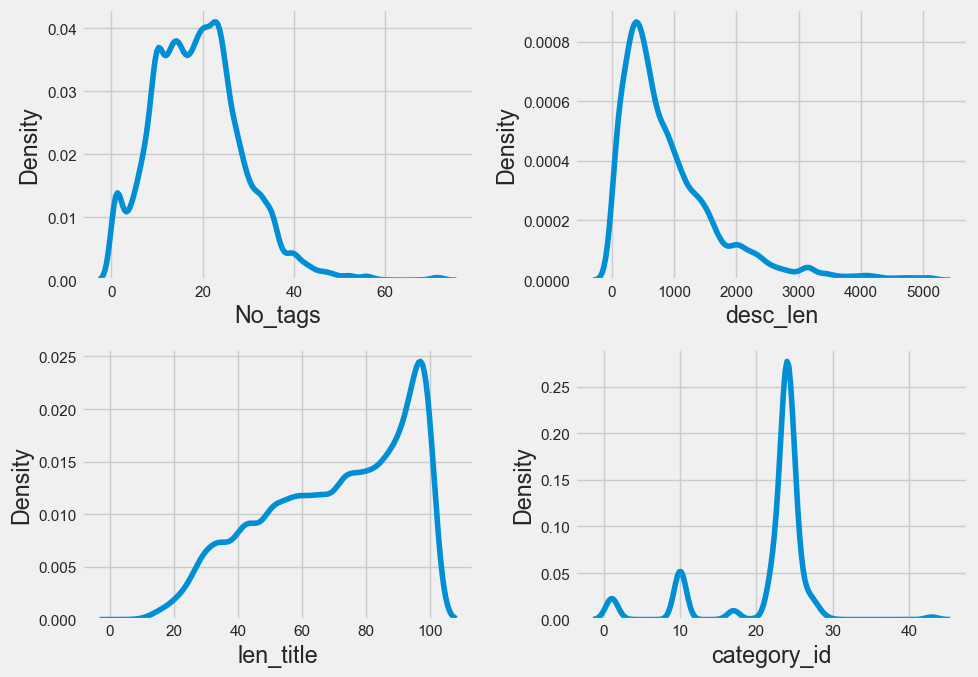

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

sns.kdeplot(data_new['No_tags'], ax=axs[0, 0])
sns.kdeplot(data_new['desc_len'], ax=axs[0, 1])
sns.kdeplot(data_new['len_title'], ax=axs[1, 0])
sns.kdeplot(data_new['category_id'], ax=axs[1, 1])

plt.tight_layout()
plt.show()

Pada sebaran data fitur numerik terlihat terdapat beberapa fitur yang bersifat skewed negatif dan fitur len_title yang bersifat skewed positif.

### Variabel Kategorik

In [18]:
cats = ['trending_date','comments_disabled','ratings_disabled','video_error_or_removed'] 

In [19]:
def category(kolom):
    print(data_new[kolom].value_counts())
    prop_feature = data1[kolom].value_counts(normalize=True) * 100
    print(prop_feature)
    plt.figure(figsize=(6, 5))
    sns.countplot(data_new, x = kolom)
    plt.show()

trending_date
2017-12-23    199
2017-12-22    198
2018-04-15    198
2018-05-05    198
2017-12-16    197
             ... 
2018-03-26    151
2018-02-03    151
2017-12-20    149
2018-03-04    148
2018-03-15    110
Name: count, Length: 205, dtype: int64
trending_date
2017-12-23    0.540893
2017-12-22    0.538175
2018-04-15    0.538175
2018-05-05    0.538175
2017-12-16    0.535457
                ...   
2018-03-26    0.410426
2018-02-03    0.410426
2017-12-20    0.404990
2018-03-04    0.402272
2018-03-15    0.298986
Name: proportion, Length: 205, dtype: float64


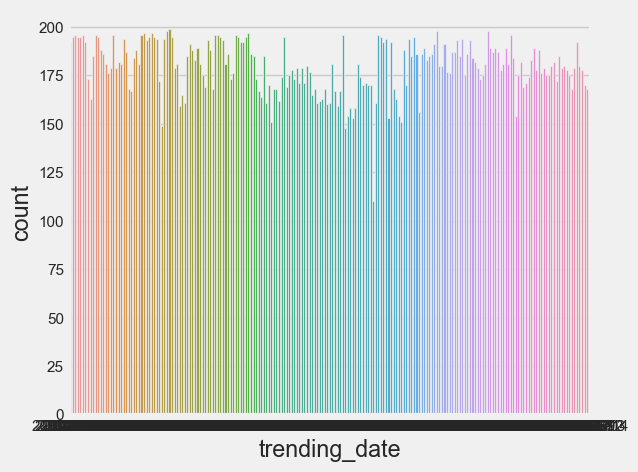

comments_disabled
False    35611
True      1180
Name: count, dtype: int64
comments_disabled
False    96.792694
True      3.207306
Name: proportion, dtype: float64


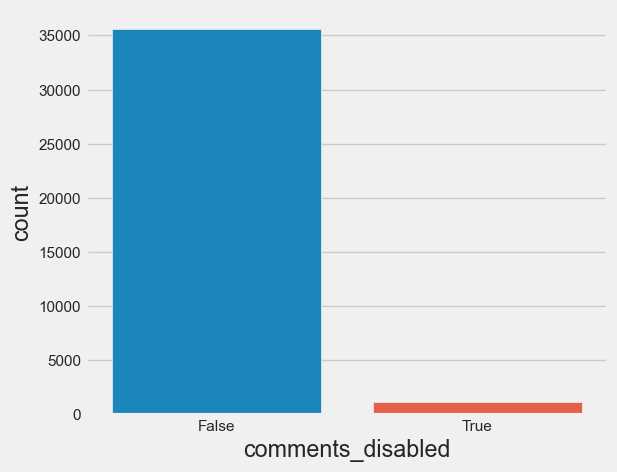

ratings_disabled
False    36034
True       757
Name: count, dtype: int64
ratings_disabled
False    97.942432
True      2.057568
Name: proportion, dtype: float64


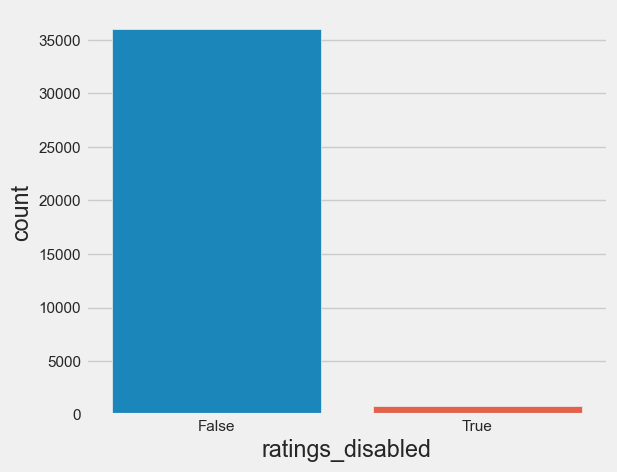

video_error_or_removed
False    36780
True        11
Name: count, dtype: int64
video_error_or_removed
False    99.970101
True      0.029899
Name: proportion, dtype: float64


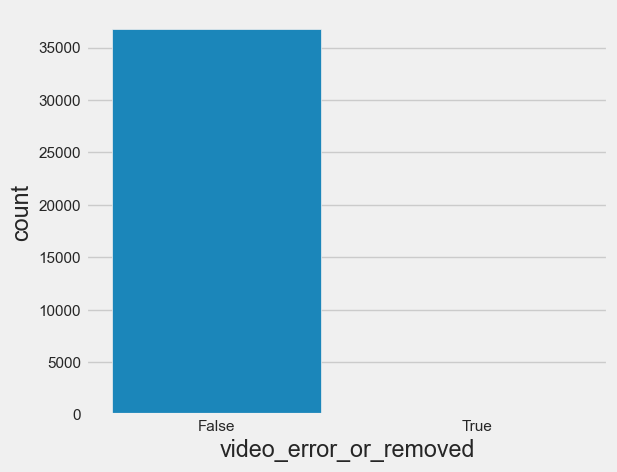

In [20]:
for i in cats:
    category(i)

## Multivariate Analysis

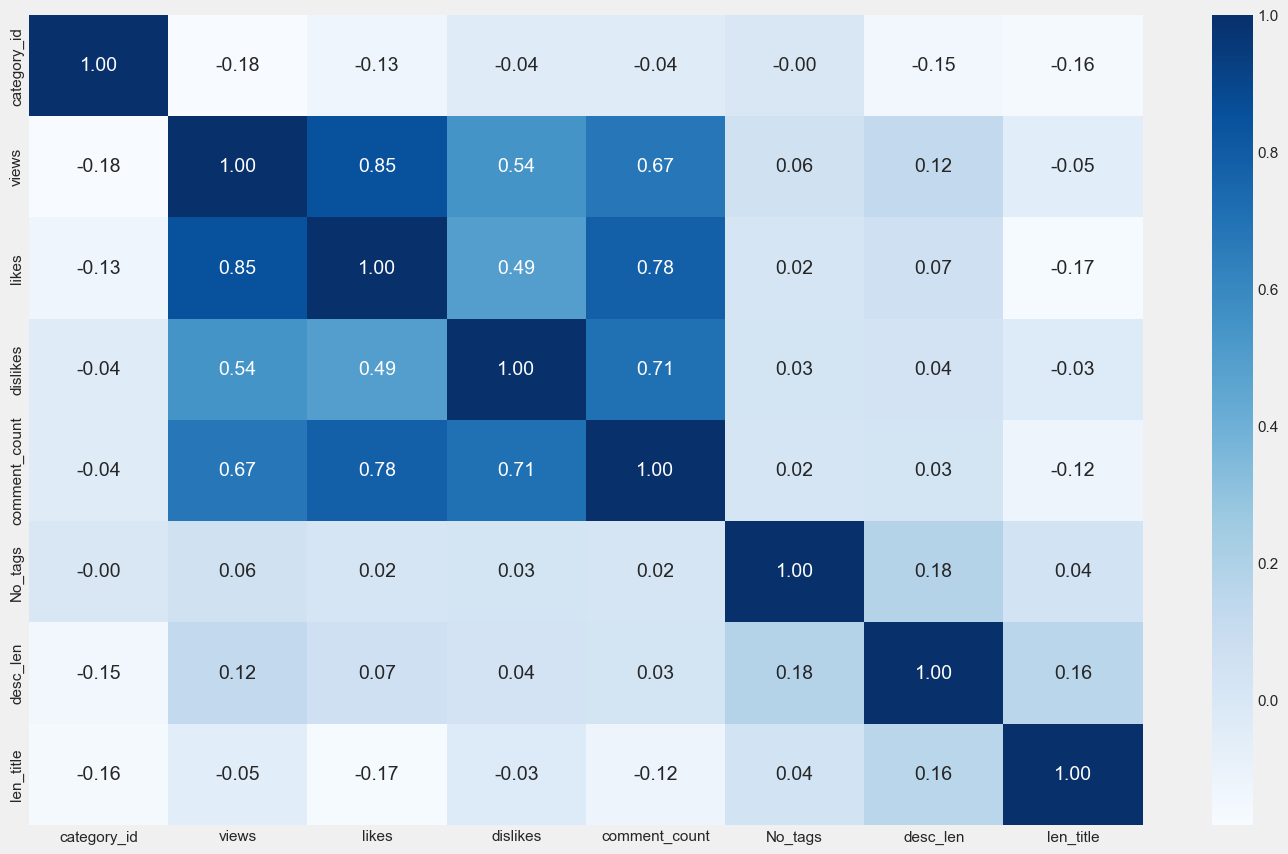

In [22]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "Blues");

Terdapat 3 fitur yang memiliki korelasi positif kuat terhadap views, yaitu fitur likes, dislikes, dan comment_count

Pada beberapa diagram boxplot terlihat sebaran data tidak merata dan banyak outlier serta terlihat juga sebaran data pada fitur No_Tags, Desc_len, dan len_title cukup miring.

Kemudian jika kita melihat pada heatmapnya, terlihat ada beberapa fitur yang berkorelasi positif dengan penayangan suatu video, seperti likes, dislikes, comment_count, No_tags, dan desc_len, jadi mungkin beberapa fitur tersebut merupakan fitur yang penting. 

## Data Preparation

Duplicate Values

In [24]:
data.duplicated().sum()

4229

In [25]:
#dropping duplicate data
data_clean = data.drop_duplicates()

In [26]:
data_clean.duplicated().sum()

0

Outliers

Text(0.5, 0, '')

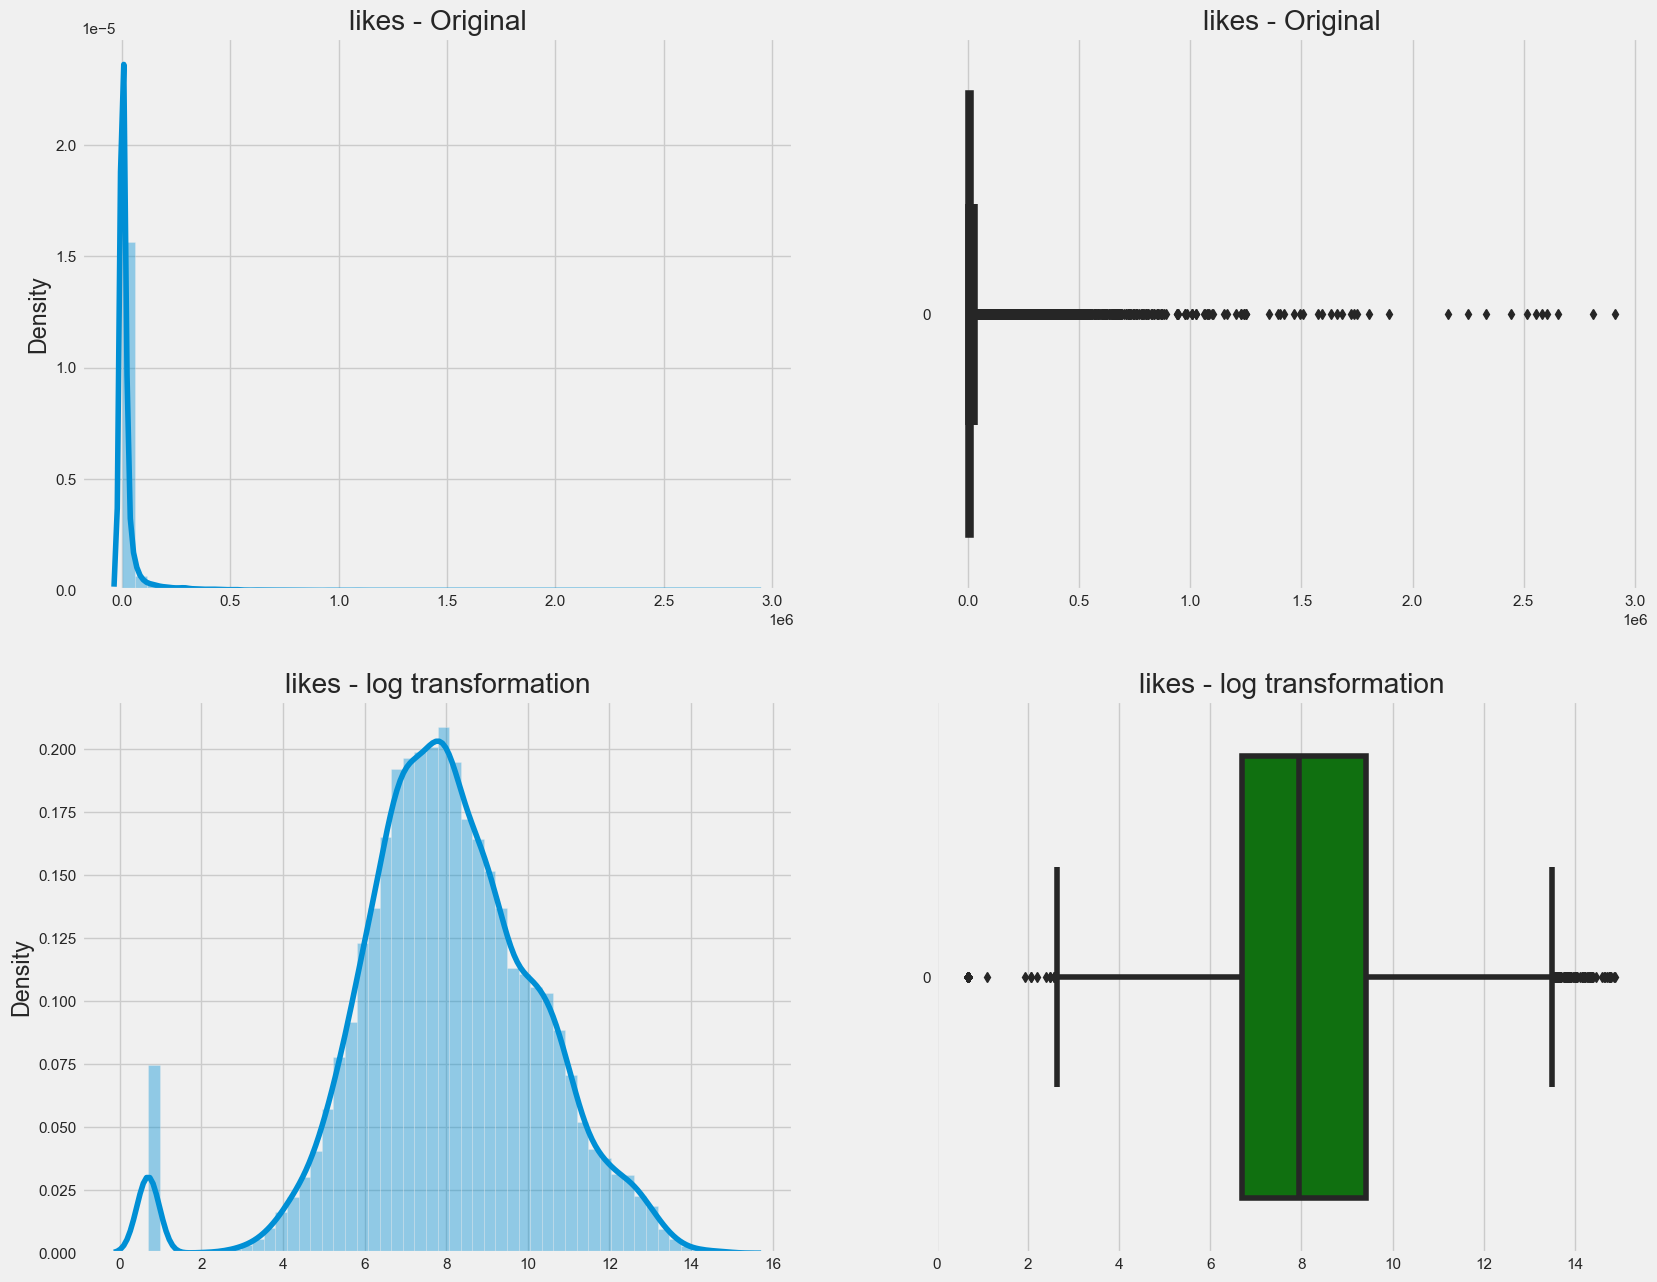

In [27]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

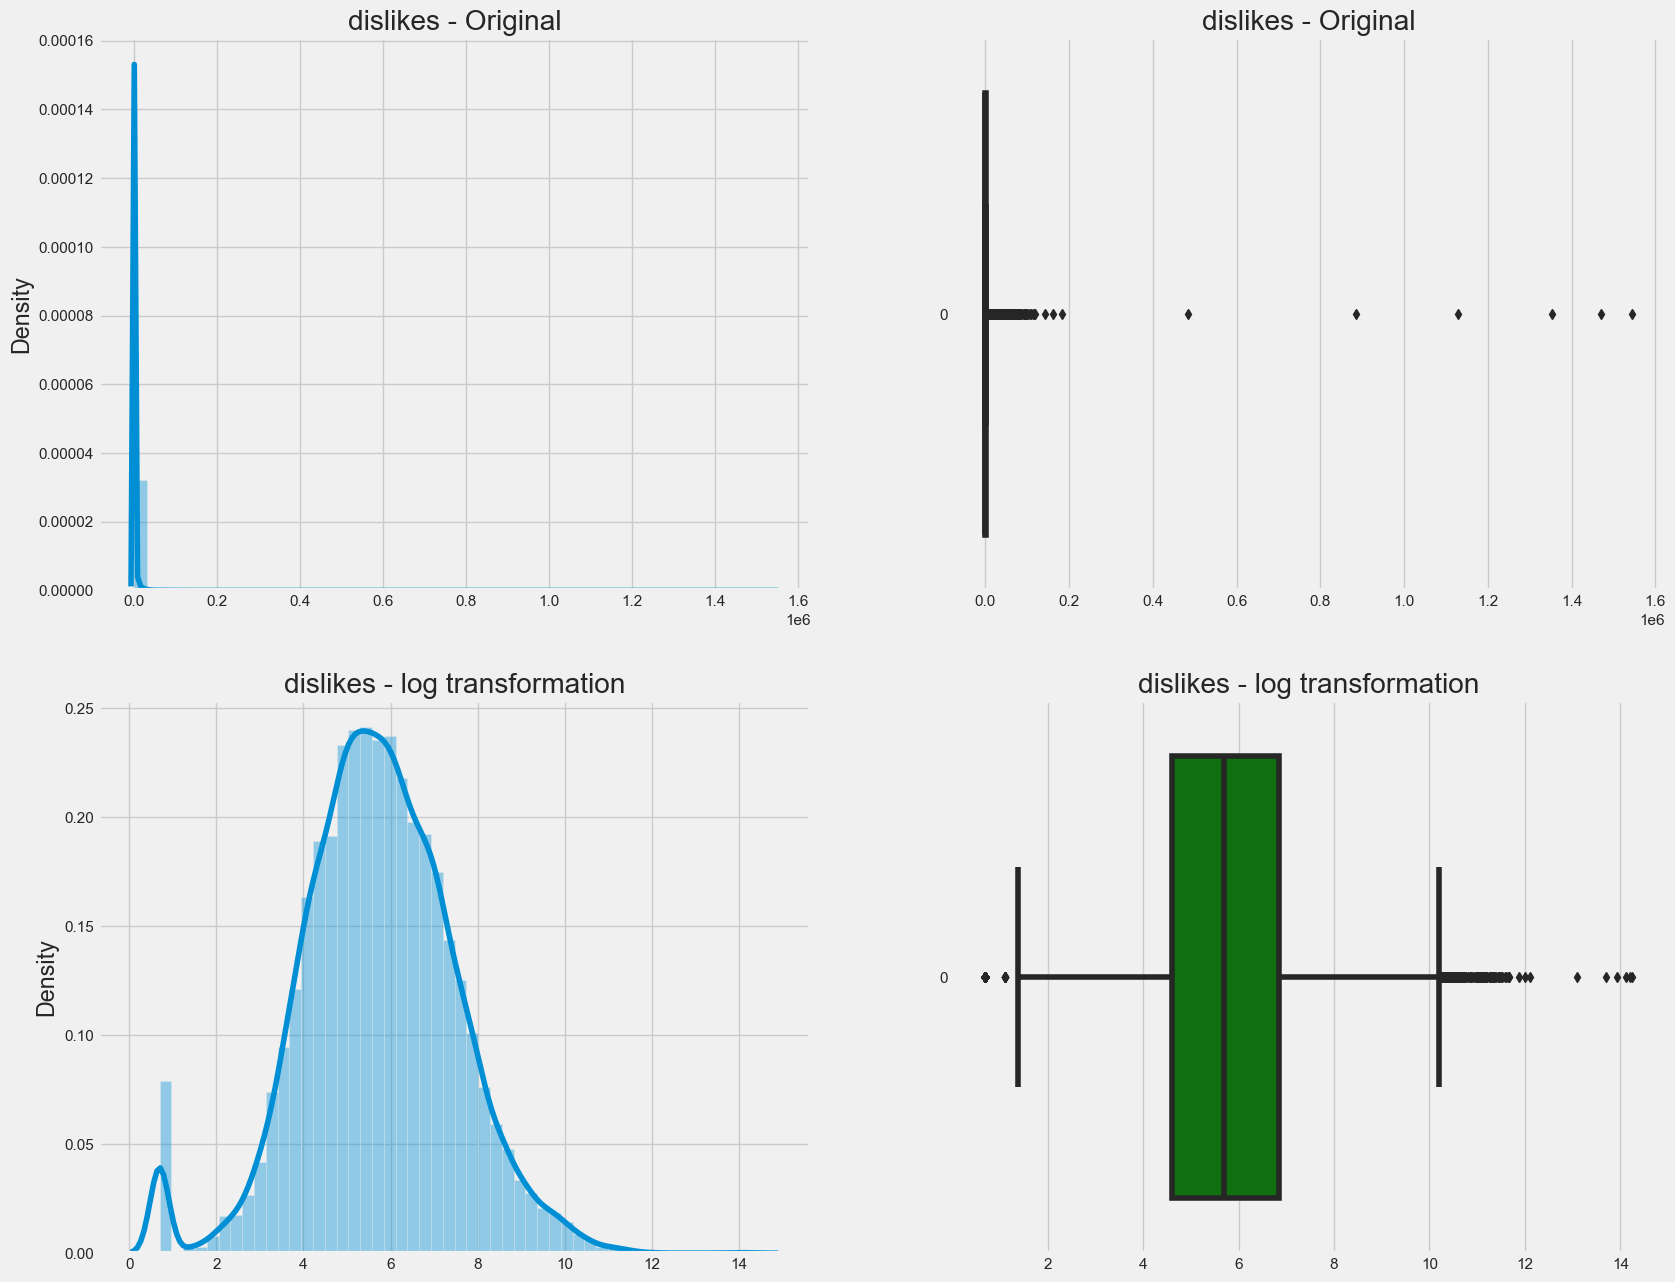

In [28]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

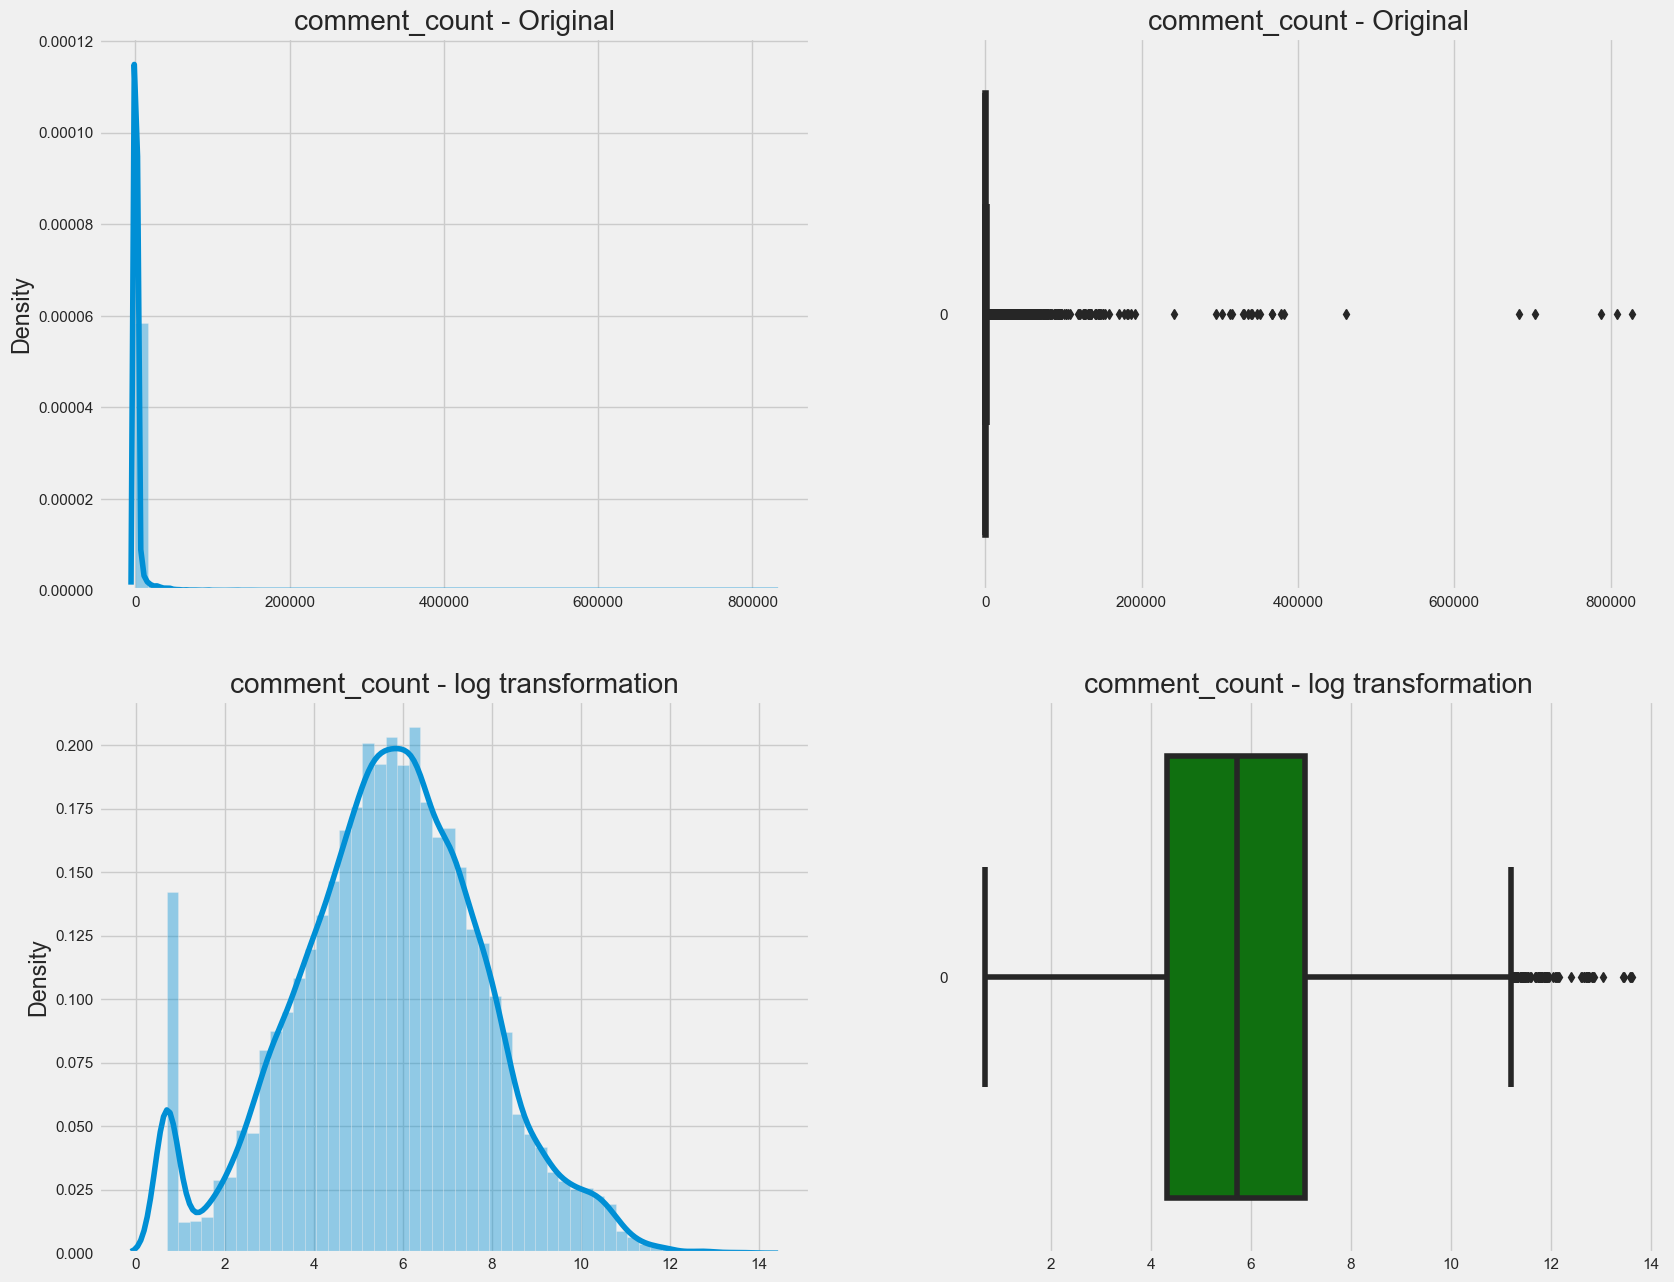

In [29]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

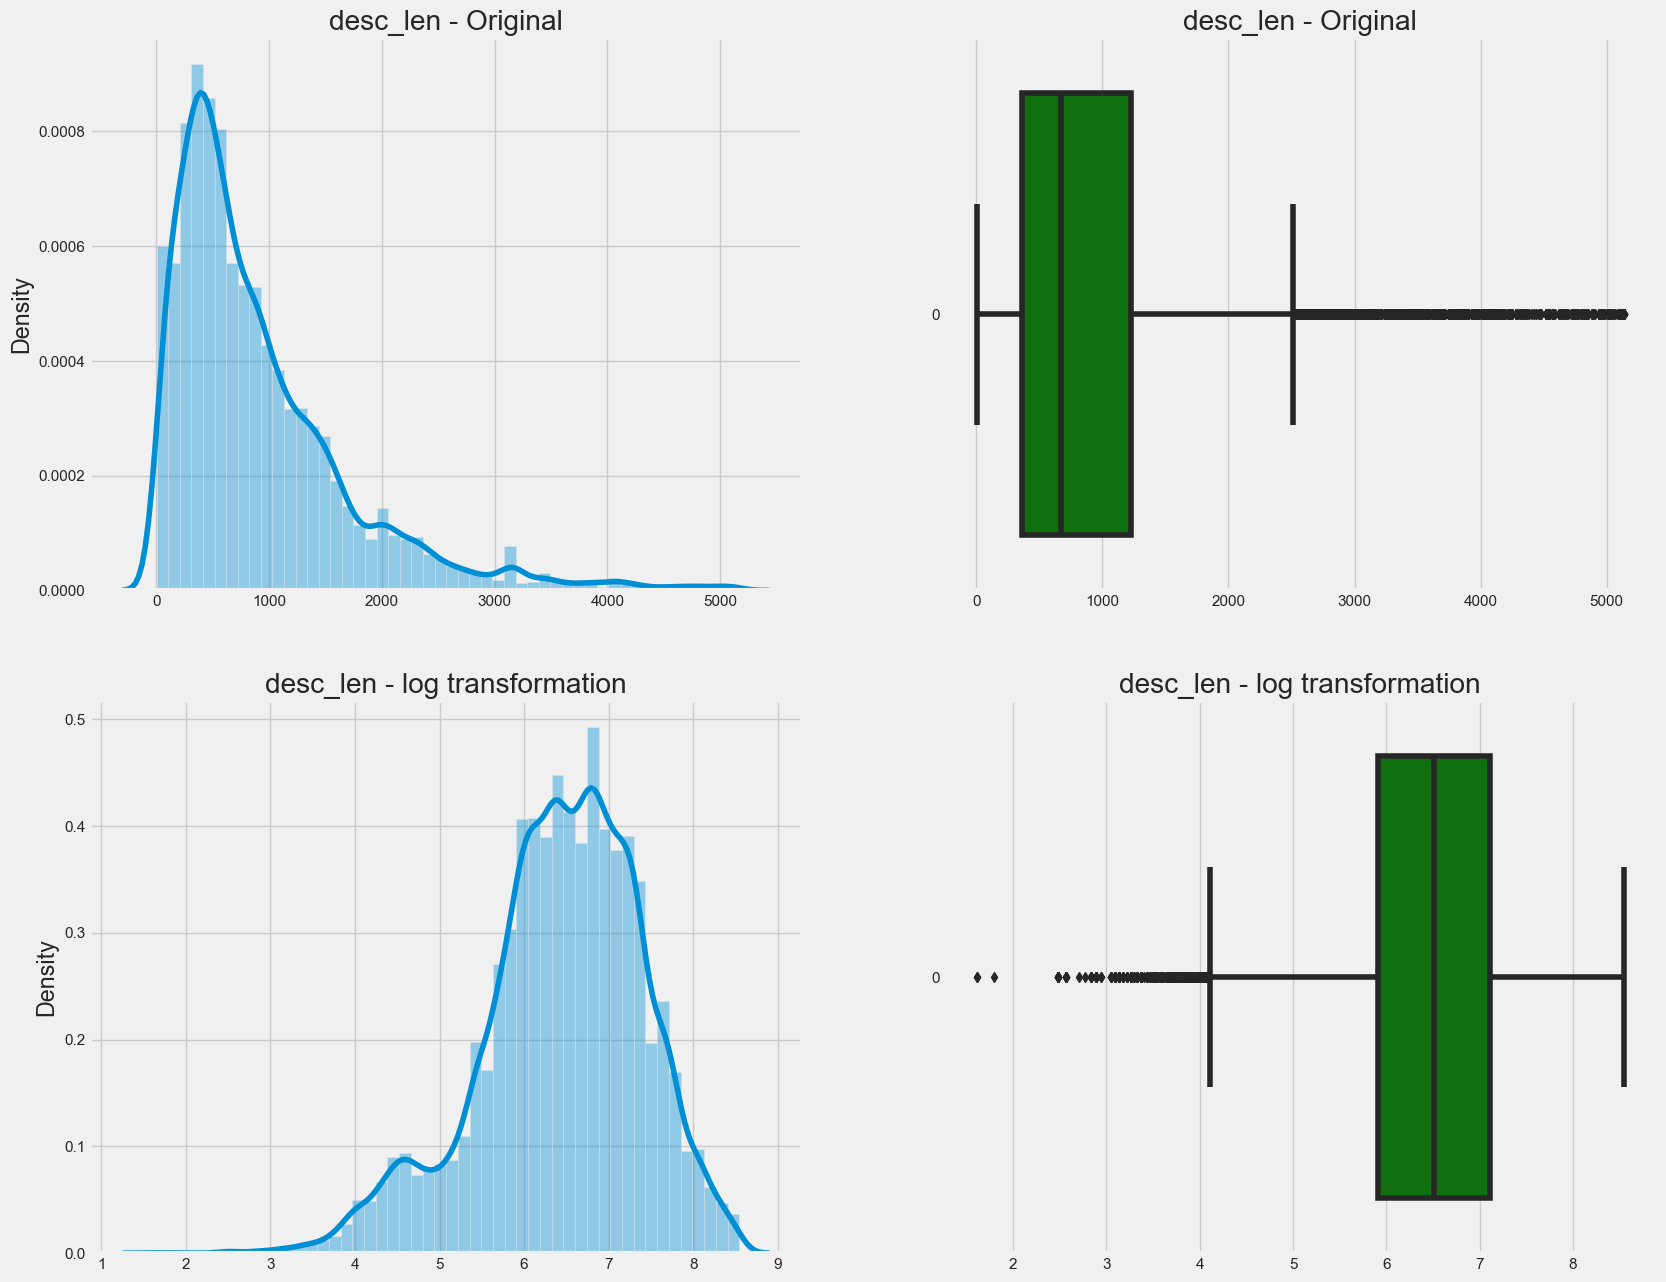

In [30]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['desc_len'],kde=True, ax=ax[0,0])
ax[0,0].set_title('desc_len - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['desc_len'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('desc_len - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['desc_len']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('desc_len - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['desc_len']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('desc_len - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

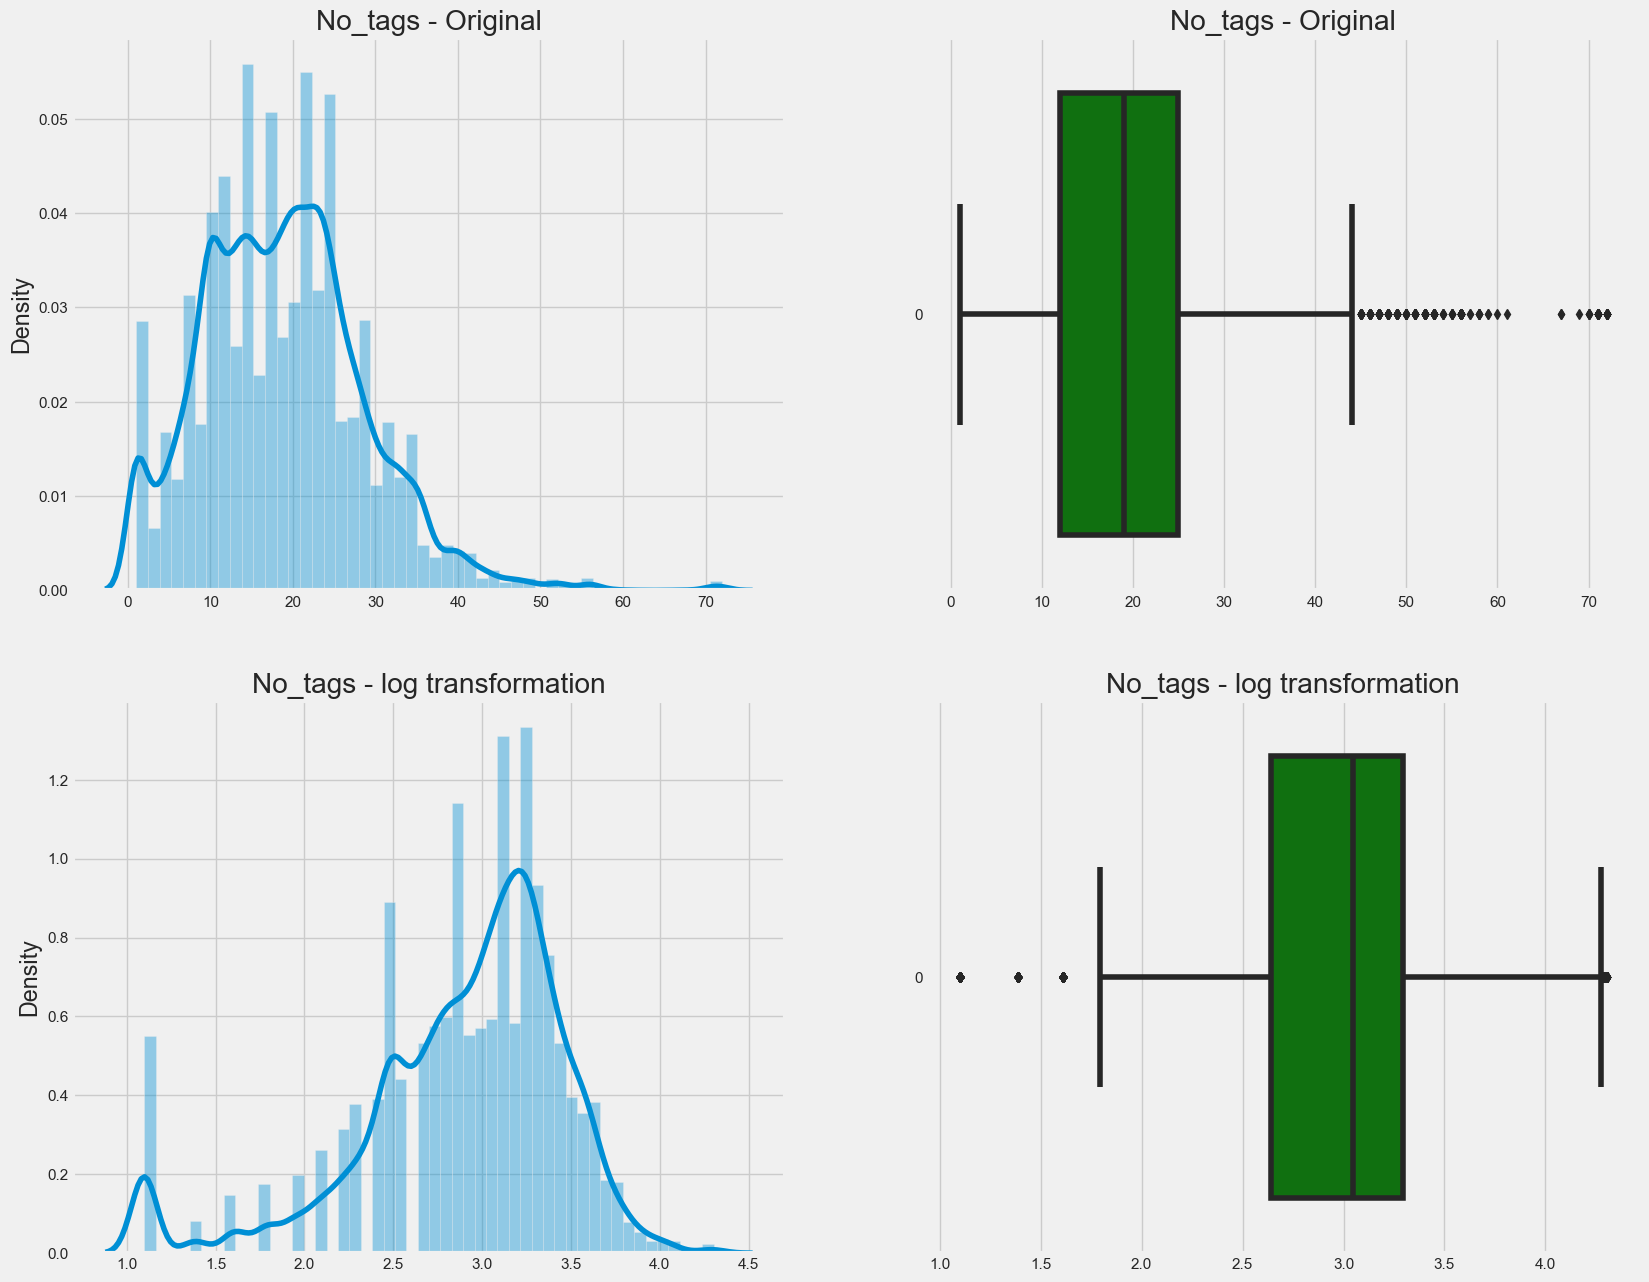

In [31]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['No_tags'],kde=True, ax=ax[0,0])
ax[0,0].set_title('No_tags - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['No_tags'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('No_tags - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['No_tags']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('No_tags - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['No_tags']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('No_tags - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

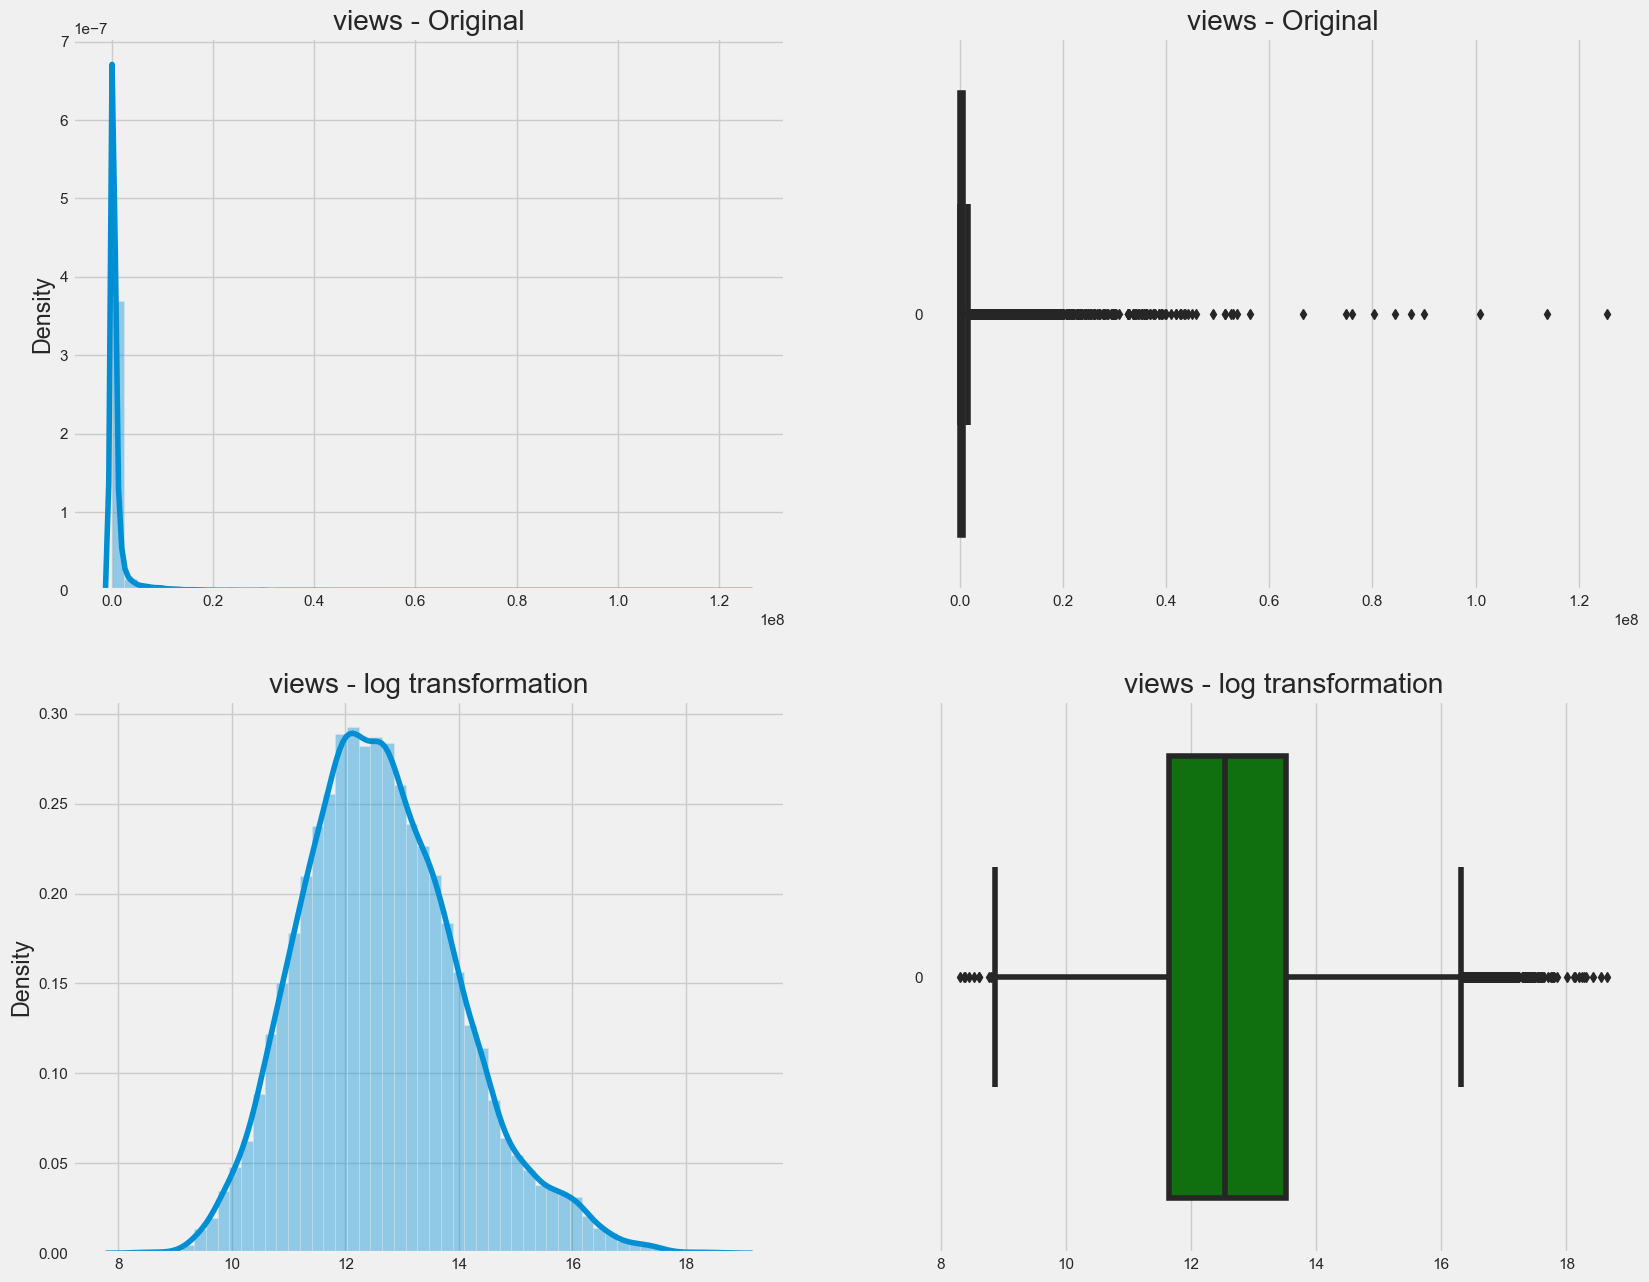

In [32]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [33]:
features = ['category_id','views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

### Normalization

In [36]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [37]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,publish_date
count,32562.000000,3.256200e+04,3.256200e+04,3.256200e+04,32562.000000,32562.000000,32562.000000,32562.000000,32562
mean,21.602420,1.007091e+06,2.595444e+04,1.596781e+03,2561.672747,18.849057,913.270684,70.995670,2018-02-16 23:35:27.363183872
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,2017-05-27 00:00:00
25%,23.000000,1.141622e+05,8.000000e+02,9.900000e+01,74.000000,12.000000,366.000000,54.000000,2017-12-25 00:00:00
50%,24.000000,2.777880e+05,2.817000e+03,2.930000e+02,306.000000,19.000000,673.000000,75.000000,2018-02-12 00:00:00
75%,24.000000,7.389245e+05,1.229900e+04,9.430000e+02,1188.000000,25.000000,1226.000000,91.000000,2018-04-12 00:00:00
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,2018-06-13 00:00:00
std,6.525405,3.171556e+06,9.720113e+04,1.703103e+04,14885.907004,9.863164,807.088596,22.280423,NaN


In [38]:
df_pre.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,log_desc_len,log_len_title,std_category_id,std_views,std_likes,std_dislikes,std_comment_count,std_No_tags,std_desc_len,std_len_title
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,6.825460,4.406719,0.000000,0.008709,0.011661,0.000516,0.001066,0.197183,0.178648,0.800000
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,7.711101,4.077537,0.571429,0.004673,0.000252,0.000585,0.000000,0.253521,0.434249,0.557895
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,6.180017,4.077537,0.547619,0.003747,0.000690,0.000157,0.000180,0.183099,0.093318,0.557895
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,5.575949,3.433987,0.523810,0.009875,0.024154,0.001051,0.003243,0.267606,0.050653,0.263158
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,6.625392,4.488636,0.547619,0.003667,0.000169,0.000190,0.000080,0.140845,0.146113,0.873684


- Menghilangkan fitur tanggal_publikasi, waktu_publikasi, deskripsi, tag, judul, dan judul_saluran karena fitur-fitur tersebut mempunyai nilai unik tersendiri untuk setiap video yang ada.  
- Log transformasi dilakukan pada fitur-fitur yang nilai datanya bersifat numerik untuk diubah menjadi sebaran normal/hampir normal, hal ini dilakukan karena terdapat beberapa fitur yang memiliki sebaran data yang miring.  
- Terakhir kami normalisasi agar skala setiap fitur numerik mempunyai skala yang sama dan diharapkan dapat mempermudah proses pembelajaran data model machine learning yang akan dibuat.

## Split Train & Test

<Axes: >

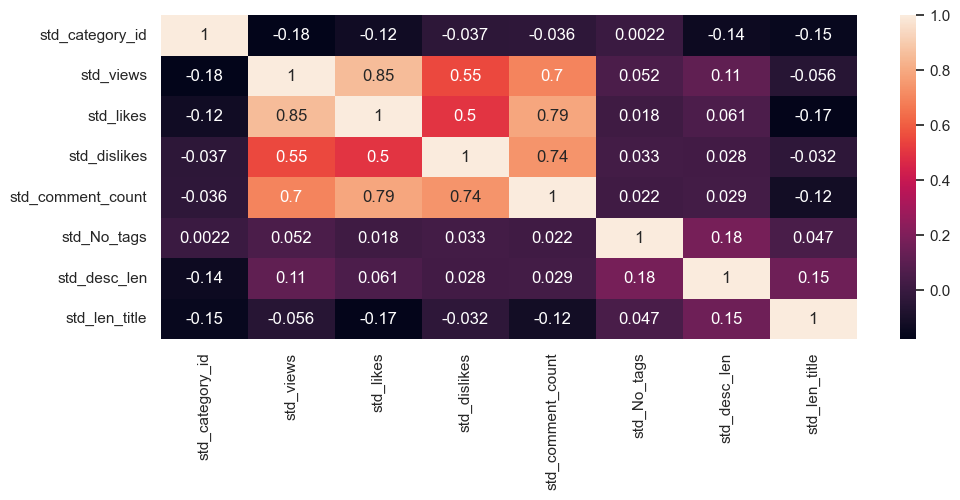

In [39]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']].corr(), annot=True)

In [40]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count','std_No_tags','std_desc_len','std_len_title']] # menggunakan semua feature kecuali target
y = df_pre['std_views']

In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

## Fit Simple Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
pred = regressor.predict(xtest) 

In [45]:
print(regressor.intercept_)

-0.00012201303293149154


### Evaluation

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred))

In [47]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-0.00902089  0.64657896  0.53437326 -0.21403023  0.00395174  0.00615419
  0.00689205]
Intercept: 
 -0.00012201303293149154
MAE: 0.01
RMSE: 0.01
R2 score: 0.78


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(xtest)
  y_pred_train = model.predict(xtrain)

  print('RMSE (test): ' + str(mean_squared_error(ytest, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(ytrain, y_pred_train, squared=False)))
    
  print('r2 (test): ' + str(r2_score(ytest, y_pred)))
  print('r2 (train): ' + str(r2_score(ytrain, y_pred_train)))

eval_regression(regressor)

RMSE (test): 0.012151278519364527
RMSE (train): 0.012253153657086189
r2 (test): 0.779929481352955
r2 (train): 0.7622276257844693


R2 antara data train dan test tidak jauh. model tidak overfit

### Fit Ridge Regularization Model

In [48]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [67]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model)

Coefficients: 
 [-1.07902343e-02  5.73412504e-01  2.84753301e-01 -3.11460497e-05
  4.21451401e-03  6.69915568e-03  6.45365342e-03]
Intercept: 
 0.0011322654425272418
RMSE (test): 0.012350142259605595
RMSE (train): 0.01242893932505717
r2 (test): 0.7726673384891748
r2 (train): 0.7553564496293275


Performanya tidak bertambah karena model awal tidak overfitting

### Hyperparameter Tuning - Ridge

In [68]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

alpha = [0.001, 0.01]
solver = ['auto', 'cholesky', 'lsqr']
hyperparameters = dict(alpha=alpha, solver=solver)

from sklearn.linear_model import Ridge
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=5, random_state=42)
rs.fit(xtrain, ytrain)
eval_regression(rs)

RMSE (test): 0.012151267295625778
RMSE (train): 0.012253154383132344
r2 (test): 0.7799298878966554
r2 (train): 0.7622275976066257


Performanya tidak bertambah karena model awal tidak overfitting

### Regularization - Lasso

In [69]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)
eval_regression(lasso_model)

RMSE (test): 0.025903748259132196
RMSE (train): 0.02512853573286332
r2 (test): -9.933321162658437e-05
r2 (train): 0.0


Performanya jelek dan model tersebut tidak cocok digunakan.

R2 sebesar 0 berarti regresi Anda tidak lebih baik daripada mengambil nilai rata-rata, yaitu Anda tidak menggunakan informasi apa pun dari variabel lain. R2 Negatif berarti kinerja Anda lebih buruk daripada nilai rata-rata.

### Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)
eval_regression(rf)

RMSE (test): 0.00499145496435963
RMSE (train): 0.0019718973020722906
r2 (test): 0.9628659574993186
r2 (train): 0.9938420774752419


Text(0.5, 1.0, 'feature importance score')

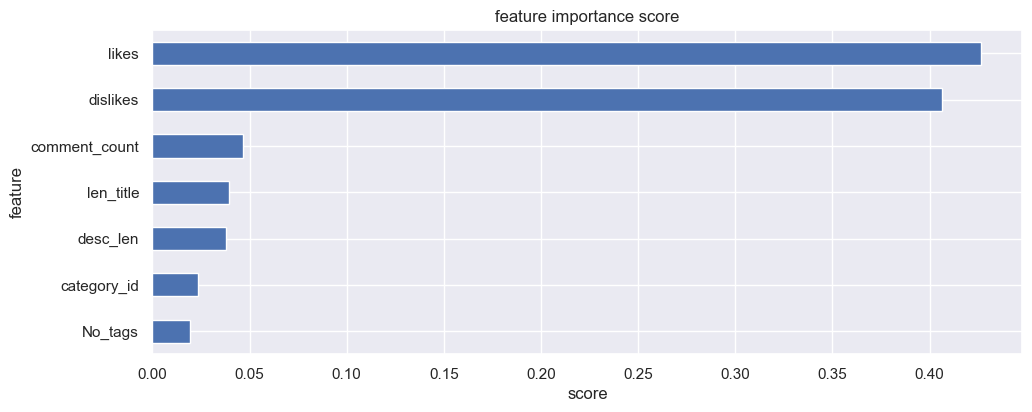

In [71]:
X=data[['category_id','likes','dislikes','comment_count','No_tags','desc_len','len_title']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Model yang kami pilih memiliki kecenderungan overfitting yang sangat kecil, namun menurut kami masih dapat ditoleransi dalam batas kewajaran normal, dimana akurasi train memiliki nilai 99% dan akurasi test memiliki nilai 96,26%.

Berdasarkan percobaan yang telah dilakukan, terdapat model yang baik untuk menentukan views video Youtube yaitu **Random Forest dengan RMSE 0.004, dan R2 0.96 menjadikan Random Forest model terbaik**